## British Airways Sentiment Analysis

In [19]:
#installing all the required libraries
!pip install wordcloud
!pip install matplotlib
!pip install textblob
!pip install nltk


In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    print(f"   ---> {len(reviews)} total reviews")




Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


#### Creating a DataFrame from the scraped reviews and save it as a CSV file for later analysis

In [23]:
# Save the reviews to a CSV file
df = pd.DataFrame()
df["reviews"] = reviews
df.to_csv("C:/Users/jckat/OneDrive/Documents/GitHub/British Airways/Data/BA_reviews.csv", index=False)
print("Scraping completed and data saved to 'Data/BA_reviews.csv'")

Scraping completed and data saved to 'Data/BA_reviews.csv'


In [24]:
df.head(20)

,reviews
0,✅ Trip Verified | Flight mainly let down by ...
1,✅ Trip Verified | Another awful experience b...
2,"✅ Trip Verified | The service was rude, full..."
3,✅ Trip Verified | This flight was a joke. Th...
4,✅ Trip Verified | This time British Airways ...
5,"✅ Trip Verified | The seats were excellent, ..."
6,✅ Trip Verified | After the nightmare of get...
7,✅ Trip Verified | Prior to boarding a gate a...
8,✅ Trip Verified | I flew from Amsterdam to L...
9,"✅ Trip Verified | First the good news, the clu..."


### Cleaning the Data

##### Loading the  raw review data, cleaning the text by removing HTML tags, non-alphabet characters, and converting to lowercase, then save the cleaned data to a new CSV file

In [25]:
# Load data
df = pd.read_csv(r'C:/Users/jckat/oneDrive/Documents/GitHub/British Airways/Data/BA_reviews.csv')

# Clean data
df['reviews'] = df['reviews'].str.replace(r'<.*?>', '', regex=True)  # Remove HTML tags
df['reviews'] = df['reviews'].str.replace(r'[^a-zA-Z\s]', '', regex=True)  # Remove non-alphabet characters
df['reviews'] = df['reviews'].str.lower()  # Convert to lowercase

# Save cleaned data
df.to_csv(r'C:/Users/jckat/oneDrive/Documents/GitHub/British Airways/Data/cleaned_BA_reviews.csv', index=False)
print("Data cleaning completed and data saved to 'C:/Users/jckat/oneDrive/Documents/GitHub/British Airways/Data/cleaned_BA_reviews.csv'")


Data cleaning completed and data saved to 'C:/Users/jckat/oneDrive/Documents/GitHub/British Airways/Data/cleaned_BA_reviews.csv'


#### Analyzing the Data

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import pandas as pd

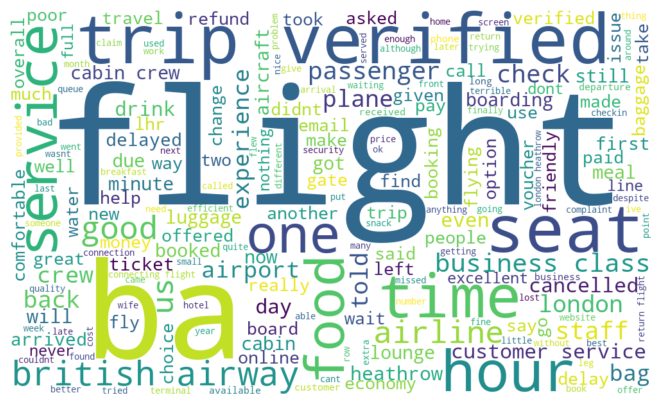

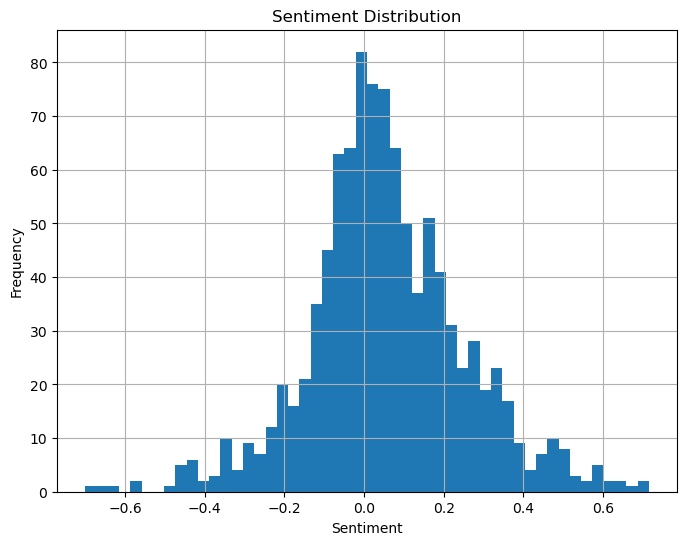

In [29]:


# Load cleaned data
df = pd.read_csv(r'C:/Users/jckat/oneDrive/Documents/GitHub/British Airways/Data/cleaned_BA_reviews.csv')

# Sentiment Analysis
df['Sentiment'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Word Cloud
text = ' '.join(df['reviews'].tolist())
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(text)

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Sentiment distribution
plt.figure(figsize=(8, 6))
df['Sentiment'].hist(bins=50)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

#  Reviews
###### Load the cleaned review data, perform sentiment analysis using TextBlob, 
###### and generate separate word clouds for positive and negative reviews 
###### based on sentiment polarity scores.


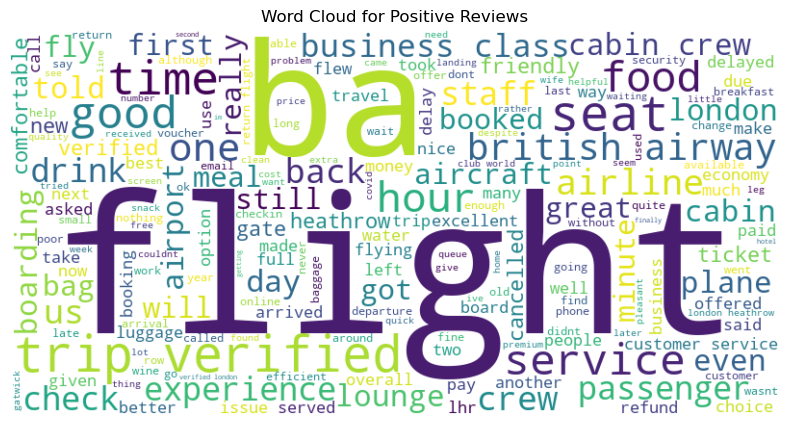

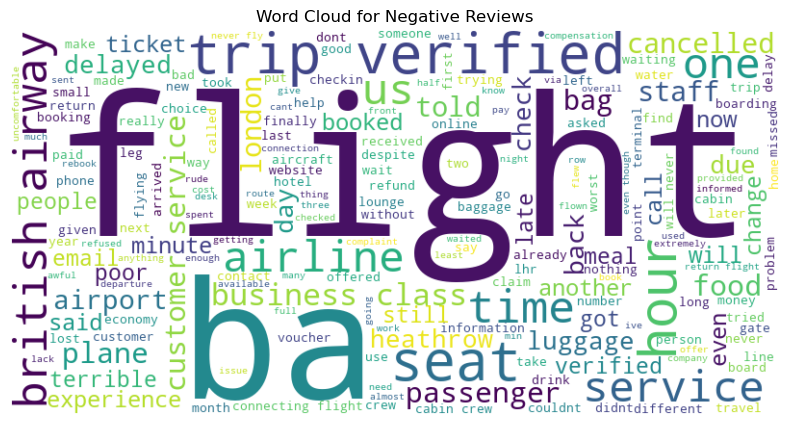

In [30]:


# Load cleaned data
df = pd.read_csv(r'C:/Users/jckat/oneDrive/Documents/GitHub/British Airways/Data/cleaned_BA_reviews.csv')

# Sentiment Analysis
df['Sentiment'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Separate positive and negative reviews
positive_reviews = df[df['Sentiment'] > 0]
negative_reviews = df[df['Sentiment'] < 0]

# Generate word cloud for positive reviews
positive_text = ' '.join(positive_reviews['reviews'].tolist())
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Plot word cloud for positive reviews
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

# Generate word cloud for negative reviews
negative_text = ' '.join(negative_reviews['reviews'].tolist())
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot word cloud for negative reviews
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

###### Load cleaned review data, perform sentiment analysis with TextBlob, classify each review as Positive, Negative, or Neutral,
###### count how many reviews fall into each category, and visualize the results using a bar chart.


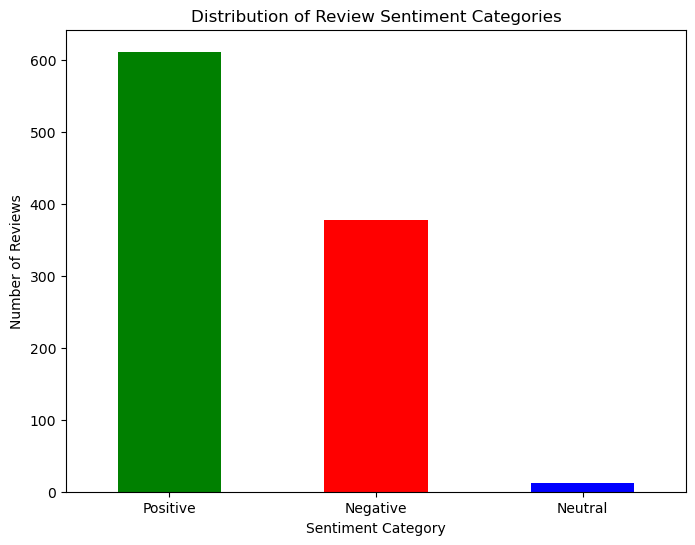

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob

# Load cleaned data
df = pd.read_csv(r'C:/Users/jckat/oneDrive/Documents/GitHub/British Airways/Data/cleaned_BA_reviews.csv')

# Sentiment Analysis
df['Sentiment'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify reviews into positive, negative, and neutral
df['Sentiment_Category'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Count the number of reviews in each category
sentiment_counts = df['Sentiment_Category'].value_counts()

# Plot the distribution of sentiment categories
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribution of Review Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()